In [1]:
import pandas as pd 
from datetime import datetime, timedelta, date
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier

## 1.1 Import Datasets

In [4]:
url = 'https://raw.githubusercontent.com/arofiqimaulana/Artificial-Intelligence/master/Supervised%20Learning/Decision%20Tree/CART/diabetes.csv'

In [5]:
df = pd.read_csv(url)

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df[feature_cols]
y = df.Outcome

## 1.2 Split datasets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 2. Modeling

In [9]:
fit = GradientBoostingClassifier().fit(X_train, y_train.values.ravel())
y_pred = fit.predict(X_test)

## 2.2 Evaluation Model

Tahapan ini berfungsi untuk mengetahui apakah model yang digunakan layak digunakan alat prediksi. Beberapa cara yang dapat dijadikan evaluasi model

- Akurasi (> 80%)
- Presisi (> 80%)
- F1-Score (> 80%)
- Recall (> 80%)

In [10]:
confusion_matriks = confusion_matrix(y_test, y_pred)
classification_reports = classification_report(y_test, y_pred)

In [11]:
print(confusion_matriks)

[[116  35]
 [ 27  53]]


In [12]:
print(classification_reports)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.66      0.63        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



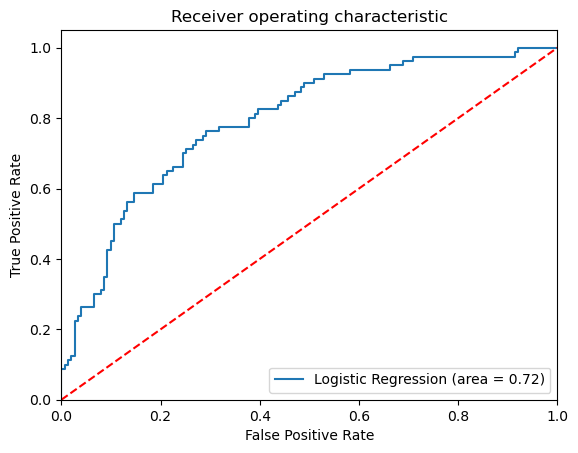

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, fit.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, fit.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
"""
Variabel mana yang paling penting dapat dilihat di bagian ini
"""
df_importance = pd.DataFrame(fit.feature_importances_).T
df_importance.columns = feature_cols
df_importance2 = df_importance.T.reset_index()
df_importance2.columns = ['variabel','relatif_importance']
df_importance2 = df_importance2.sort_values('relatif_importance',ascending=False)
df_importance2

,variabel,relatif_importance
4,Glucose,0.431856
2,BMI,0.209030
3,Age,0.158122
6,DiabetesPedigreeFunction,0.090505
0,Pregnancies,0.042002
1,Insulin,0.038969
5,BloodPressure,0.029515


<BarContainer object of 7 artists>

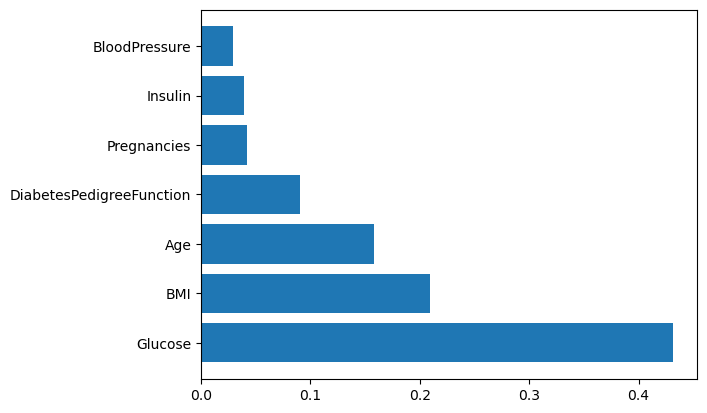

In [16]:
plt.barh(df_importance2['variabel'],df_importance2['relatif_importance'])

# 3. Compare Algorithm

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [18]:
cv=StratifiedKFold(n_splits=10)

models = []
models.append(('Decision Tree - CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))

results = []
names = []
tabel=[]
for name, model in models:
    akurasi=cross_val_score(model, X_train, y_train.values.ravel(),cv=cv)
    results.append(akurasi)
    names.append(name)
    hasil = [name, akurasi.mean()]
    tabel.append(hasil)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [19]:
df_compare = pd.DataFrame(tabel,columns = ['Algorithms','Accuracy'])
df_compare.sort_values('Accuracy',ascending=False,inplace=True)

In [20]:
df_compare

,Algorithms,Accuracy
4,Random Forest,0.780084
5,Logistic Regression,0.776520
6,Gradient Boosting,0.763277
7,Ada Boost,0.757897
3,SVM,0.756045
2,Naive Bayes,0.755940
1,KNN,0.716771
0,Decision Tree - CART,0.709294


# 4. Predict New Data
Tahap ini digunakan untuk melakukan prediksi terhadap data baru. Misalkan data baru adalah di tabel X_test

In [21]:
X_new = X_test
X_new['y_pred'] = fit.predict(X_new)

In [22]:
X_new

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction,y_pred
668,6,190,34.0,43,98,58,0.430,1
324,2,0,35.7,21,112,75,0.148,0
624,2,0,30.8,21,108,64,0.158,0
690,8,0,24.6,34,107,80,0.856,0
473,7,0,29.9,50,136,90,0.210,0
...,...,...,...,...,...,...,...,...
619,0,0,32.4,24,119,0,0.141,0
198,4,99,34.8,26,109,64,0.905,0
538,0,210,36.3,23,127,80,0.804,0
329,6,68,30.8,37,105,70,0.122,0
